### This notebook explores the product related data on Amazon. Analysis of missing data has also been included

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = './Data/Amazon-GoogleProducts/'
AMAZON_DATA = DATA_PATH + "Amazon.csv"
GOOGLE_DATA = DATA_PATH + "GoogleProducts.csv"
amazon_products = pd.read_csv(AMAZON_DATA, engine='python')
google_products = pd.read_csv(GOOGLE_DATA, engine='python')

In [3]:
amazon_products.head()

,id,title,description,manufacturer,price
0,b000jz4hqo,clickart 950 000 - premier image pack (dvd-rom),NaN,broderbund,0.00
1,b0006zf55o,ca international - arcserve lap/desktop oem 30pk,oem arcserve backup v11.1 win 30u for laptops ...,computer associates,0.00
2,b00004tkvy,noah's ark activity center (jewel case ages 3-8),NaN,victory multimedia,0.00
3,b000g80lqo,peachtree by sage premium accounting for nonpr...,peachtree premium accounting for nonprofits 20...,sage software,599.99
4,b0006se5bq,singing coach unlimited,singing coach unlimited - electronic learning ...,carry-a-tune technologies,99.99


In [4]:
count_amazon_products = len(amazon_products)
count_google_products = len(google_products)

In [5]:
# Number of products on Google: 3226
# Number of products on Amazon: 1363 
#print(count_amazon_products, count_google_products)

## Plot for product count

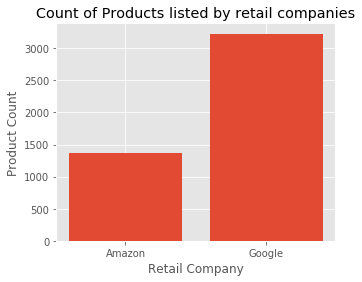

In [6]:
plt.style.use('ggplot')

product_count = [count_amazon_products, count_google_products]
company = ["Amazon", "Google"]

x_pos = range(len(product_count))

plt.figure(figsize=(5,4))
plt.bar(x_pos, product_count)
plt.xlabel("Retail Company")
plt.ylabel("Product Count")
plt.title("Count of Products listed by retail companies")

plt.xticks(x_pos, company)

plt.show()

## Missing data analysis

In [7]:
amazon_products.isnull().sum()

id                0
title             0
description     115
manufacturer      0
price             0
dtype: int64

In [8]:
missing_desc_amazon = amazon_products['description'].isnull().sum()/count_amazon_products*100
missing_desc_google = google_products['description'].isnull().sum()/count_google_products*100

missing_manu_amazon = amazon_products['manufacturer'].isnull().sum()/count_amazon_products*100
missing_manu_google = google_products['manufacturer'].isnull().sum()/count_google_products*100

missing_price_amazon = 100 - np.count_nonzero(amazon_products['price'])/count_amazon_products*100
missing_price_google = 100 - np.count_nonzero(google_products['price'])/count_google_products*100

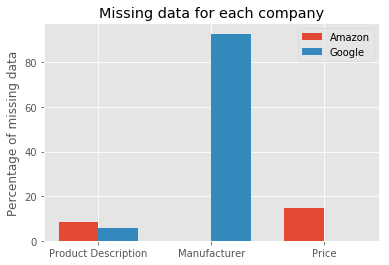

In [9]:

missing_amazon = (missing_desc_amazon, missing_manu_amazon, missing_price_amazon)
missing_google = (missing_desc_google, missing_manu_google, missing_price_google)

N = len(missing_amazon)

ind = np.arange(N) 
width = 0.35      

plt.figure(figsize=(6,4))
plt.bar(ind, missing_amazon, width, label='Amazon')
plt.bar(ind + width, missing_google, width, label='Google')

plt.ylabel('Percentage of missing data')
plt.title('Missing data for each company')

plt.xticks(ind + width/2, ('Product Description', 'Manufacturer', 'Price'))
plt.legend(loc='best')
plt.show()

## Top Manufacturers in Amazon

In [10]:
manufacturer_product = amazon_products.groupby('manufacturer').size().reset_index(name='Count')
manufacturer_product.sort_values(by=['Count'], inplace=True, ascending=False)
#manufacturer_product

[Text(0, 0.5, 'Product count'), Text(0.5, 0, 'Manufacturer')]

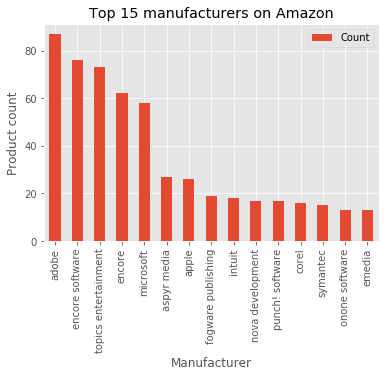

In [11]:
ax = manufacturer_product.iloc[:15].plot.bar(x='manufacturer', y='Count', title="Top 15 manufacturers on Amazon")
ax.set(xlabel="Manufacturer" , ylabel="Product count")

## Average pricing per manufacturer

In [12]:
manufacturer_price = amazon_products.groupby('manufacturer')['price'].mean().reset_index(name="avg price")
manufacturer_price.sort_values(by=['avg price'], inplace=True, ascending=False)
#manufacturer_price

Text(0.5, 1.0, 'Average pricing per manufacturer(top 15) on Amazon')

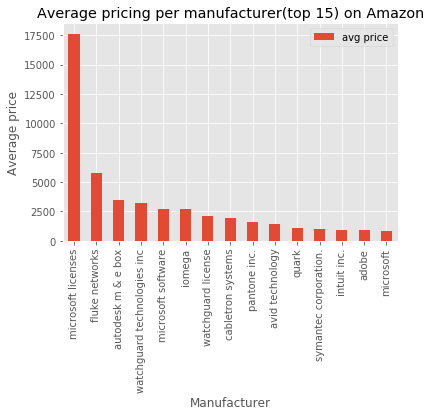

In [13]:
manufacturer_price.iloc[:15].plot.bar(x='manufacturer', y='avg price')
plt.xlabel('Manufacturer')
plt.ylabel('Average price')
plt.title('Average pricing per manufacturer(top 15) on Amazon')

In [14]:
len(amazon_products.id.unique())

1363

In [15]:
count_amazon_products

1363

In [16]:
len(google_products.id.unique())

3226

In [17]:
count_google_products

3226

## Length of product descriptions

In [18]:
amazon_products['description'].fillna(value="", inplace=True)
amazon_products['description_length'] = amazon_products['description'].apply(lambda x: len(x.split()))

In [19]:
amazon_products.head()

,id,title,description,manufacturer,price,description_length
0,b000jz4hqo,clickart 950 000 - premier image pack (dvd-rom),,broderbund,0.00,0
1,b0006zf55o,ca international - arcserve lap/desktop oem 30pk,oem arcserve backup v11.1 win 30u for laptops ...,computer associates,0.00,10
2,b00004tkvy,noah's ark activity center (jewel case ages 3-8),,victory multimedia,0.00,0
3,b000g80lqo,peachtree by sage premium accounting for nonpr...,peachtree premium accounting for nonprofits 20...,sage software,599.99,173
4,b0006se5bq,singing coach unlimited,singing coach unlimited - electronic learning ...,carry-a-tune technologies,99.99,12


Text(0.5, 1.0, 'Length of product descriptions on Amazon')

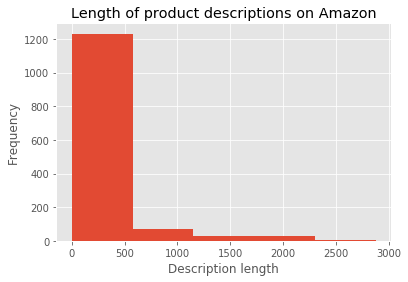

In [20]:
plt.figure(figsize=(6,4))
amazon_products.description_length.hist(bins=5)
plt.xlabel('Description length')
plt.ylabel('Frequency')
plt.title('Length of product descriptions on Amazon')